In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [36]:
# 由 Keras 讀入 MNIST
from keras.datasets import mnist

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
# 輸入格式整理
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 正規化
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [39]:
# 輸出格式整理 
from keras.utils import np_utils

In [40]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [41]:
# 決定神經網路架構、讀入相關套件
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [101]:
# 建構我們的神經網路
model = Sequential()

model.add(Dense(120, input_dim = 784))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

# 組裝
model.compile(loss='mse', optimizer = SGD(lr = 0.3), metrics = ['accuracy'])
# 檢視我們的神經網路
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 120)               94200     
_________________________________________________________________
activation_76 (Activation)   (None, 120)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 20)                2420      
_________________________________________________________________
activation_77 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_78 (Activation)   (None, 10)                0         
Total params: 96,830
Trainable params: 96,830
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 訓練神經網路
model.fit(x_train,y_train, batch_size = 100, epochs = 20, verbose = 1, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0063 - acc: 0.9615 - val_loss: 0.0067 - val_acc: 0.9568
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0061 - acc: 0.9631 - val_loss: 0.0066 - val_acc: 0.9574
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0058 - acc: 0.9643 - val_loss: 0.0064 - val_acc: 0.9578
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0056 - acc: 0.9662 - val_loss: 0.0062 - val_acc: 0.9604
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0054 - acc: 0.9672 - val_loss: 0.0060 - val_acc: 0.9608
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0052 - acc: 0.9688 - val_loss: 0.0059 - val_acc: 0.9607
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0050 - acc: 0.9699 - val_loss: 0.0058 - val_acc

In [104]:
# 檢視正確率
score = model.evaluate(x_test, y_test)

print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 1s 52us/step
loss: 0.004821601816320799
正確率 0.9701


In [105]:
# 試用我們的結果
predict = model.predict_classes(x_test)

def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

神經網路判斷為: 8


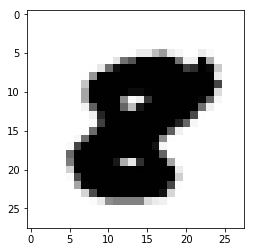

In [110]:
test(7919)

神經網路判斷為: 7


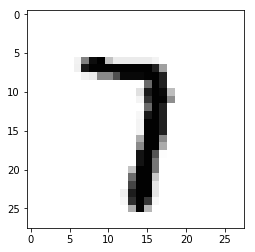

In [111]:
test(8606)

神經網路判斷為: 0


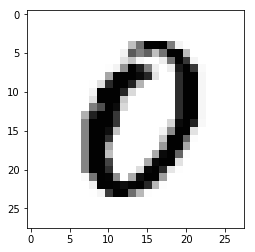

In [112]:
test(4186)

In [107]:
# 訓練好的神經網路存起來!
model_json = model.to_json()
open('stupid_model.json', 'w').write(model_json)
model.save_weights('stupid_model_weights.h5')